# **Student Performance Prediction**


### **Abstract:**

In the realm of education, understanding and predicting student performance is paramount for educators and policymakers alike. By leveraging various factors such as socio-economic background, prior academic achievements, and personal attributes, predictive models can offer insights into student outcomes. This paper aims to explore the efficacy of machine learning algorithms in forecasting student performance and to identify key predictors that influence academic success. We utilize a dataset comprising demographic information, academic records, and socio-economic indicators to train and evaluate predictive models. Our findings indicate that certain features such as parental education, attendance rates, and study habits significantly impact student performance. The predictive models developed in this study exhibit promising accuracy and can serve as valuable tools for educational institutions in identifying at-risk students and implementing targeted interventions.


### **Introduction:**

In today's educational landscape, the ability to anticipate student performance has profound implications for educational institutions, policymakers, and stakeholders. Understanding the factors that contribute to academic success or failure enables educators to implement proactive measures aimed at enhancing student outcomes and narrowing achievement gaps. While traditional methods of assessment and evaluation provide valuable insights, the advent of machine learning techniques offers new avenues for predictive analytics in education.

The predictive modeling of student performance involves analyzing a myriad of factors that extend beyond academic aptitude alone. Socio-economic background, familial support structures, learning environments, and personal attributes all play pivotal roles in shaping student achievement. By harnessing the power of machine learning algorithms, researchers can discern intricate patterns within vast datasets and derive predictive models capable of forecasting student performance with remarkable accuracy.

This study endeavors to explore the predictive capabilities of machine learning algorithms in forecasting student performance. By leveraging a comprehensive dataset encompassing demographic information, academic records, and socio-economic indicators, we seek to identify key predictors that influence academic outcomes. Through rigorous analysis and model evaluation, we aim to elucidate the complex interplay between various factors and student success.

The remainder of this paper is organized as follows: Section 2 provides an overview of related work in the field of predictive modeling in education. Section 3 outlines the methodology employed in this study, including data preprocessing, feature selection, and model training. Section 4 presents the results of our analysis, including model performance metrics and key findings. Finally, Section 5 discusses the implications of our findings and avenues for future research in the realm of student performance prediction.

# **Data Preprocessing**

**Step 1:** Import the necessary libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Step 2:** Read the data from kaggle and print the first 5 and last 5 rows.



In [134]:
# https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

df = pd.read_csv("StudentsPerformance.csv")
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**Step 3:** Print the rows and columns of the dataset.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Step 4:** Find null values.

In [136]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Step 5:** What is the type of each column of data?

In [137]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

**Step 6:** Count the number of male and female students.

In [138]:
df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

**Step 7:** Count the number of options that come under 'parental level of education

In [139]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

**Step 8:** What other columns have categorical values?

In [140]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [141]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [142]:
for column in df.columns:
    if df[column].dtype == 'object':
         print(df[column])

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object
0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 1000, dtype: object
0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental level of education, Length: 1000, dtype: object
0          standard
1          standard
2          standard
3      free/reduced
4          standard
           ...     
995        standard
996    free/reduced
997    free/reduced
998        standard
999    free/reduced
Name: lunch, Length:

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Step 9:** Create a column called 'average' to find the mean of reading, writing and math score.

In [144]:
df['average1'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

In [145]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average1
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


# **Exploratory Data Analysis**

**Step 1:** Plot a histogram of the math score, reading score and writing score as 3 subplots.

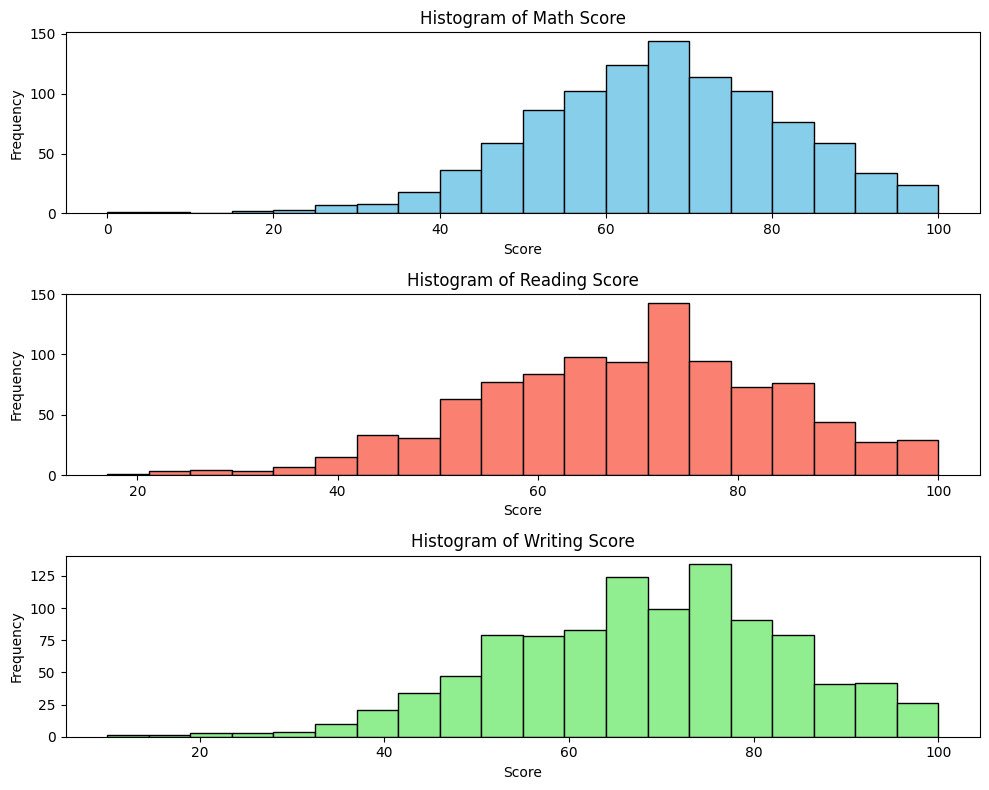

In [146]:


fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot histograms for math score, reading score, and writing score
axs[0].hist(df['math score'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Math Score')
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['reading score'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Reading Score')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['writing score'], bins=20, color='lightgreen', edgecolor='black')
axs[2].set_title('Histogram of Writing Score')
axs[2].set_xlabel('Score')
axs[2].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the plot
plt.show()


**Step 2:** Use seaborns 'pairplot' function on all the numerical data.

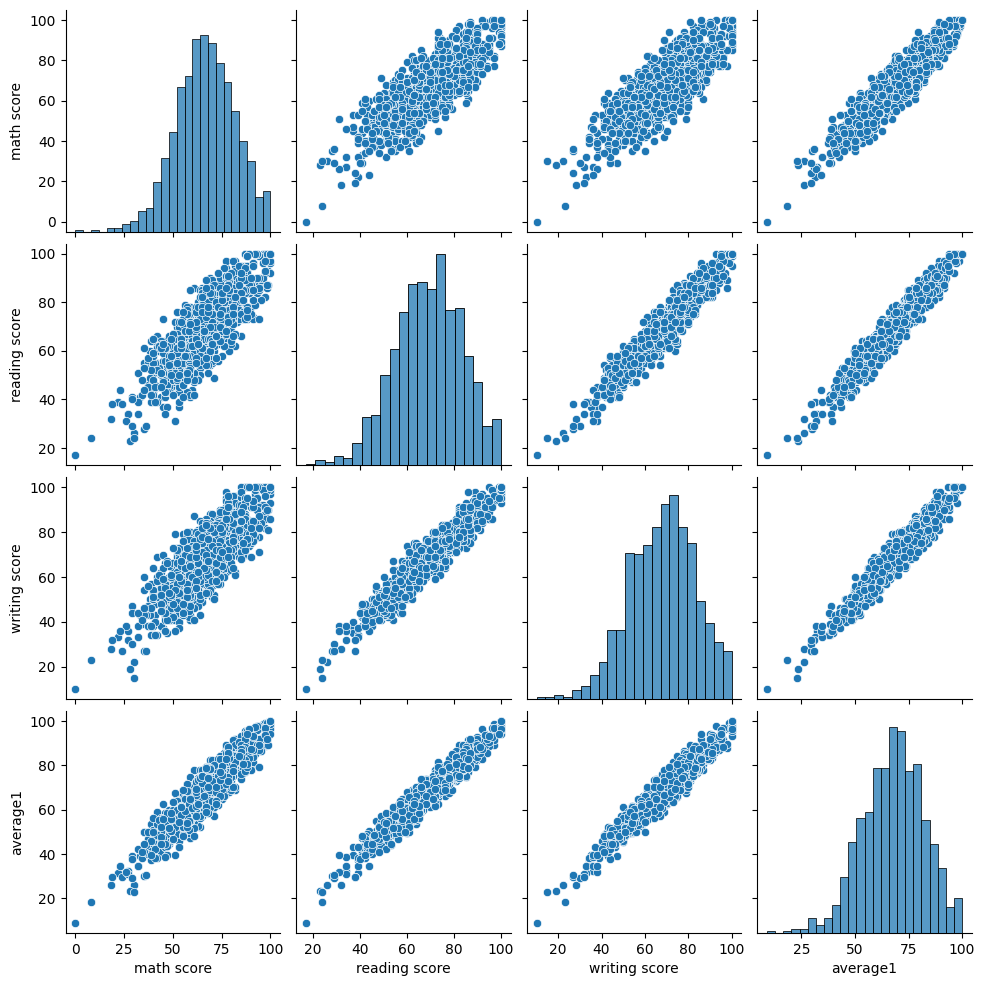

In [147]:
import seaborn as sns

numeric_df = df.select_dtypes(include='number')

# Create a pairplot
sns.pairplot(numeric_df)
plt.show()

In [148]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

**Step 3:** Plot a bar plot taking 'race/ethnicity' as x-axis and 'average' as the y-axis

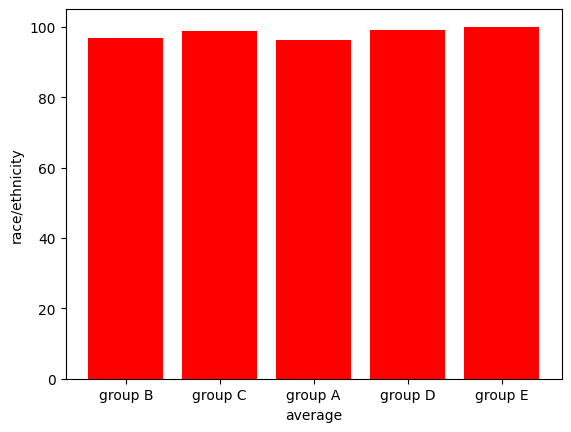

In [149]:
plt.bar(df['race/ethnicity'],df['average1'],color='r')
plt.xlabel("average")
plt.ylabel("race/ethnicity")
plt.show()

**Step 4:** Plot a bar chart to show parental education vs. average.

C:\Users\tsgte\AppData\Local\Temp\ipykernel_24476\2901559389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental level of education', y='average1' ,data=df, palette='viridis')


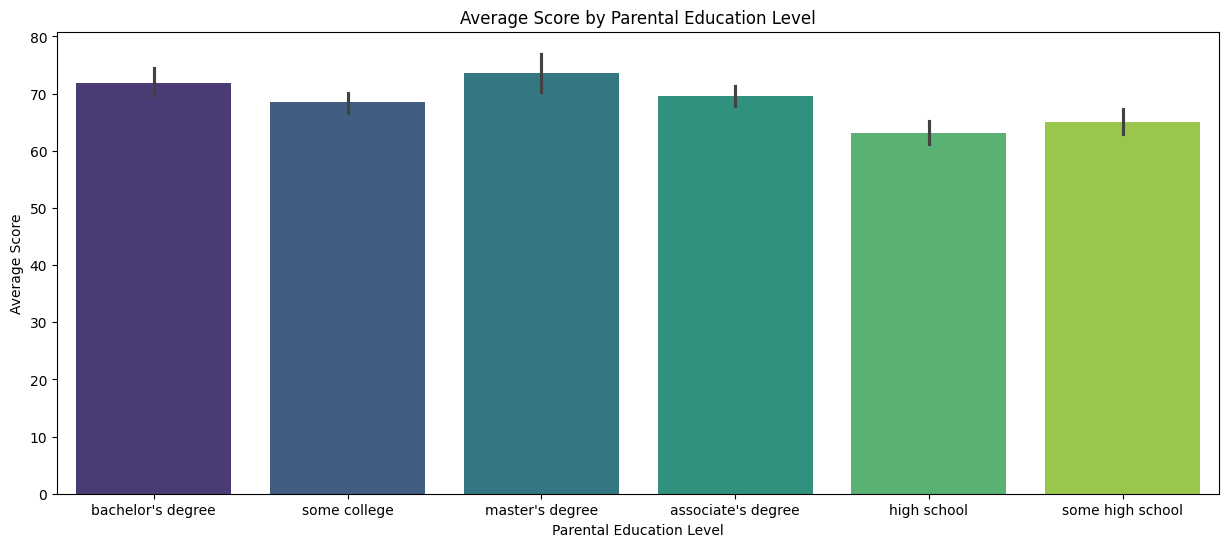

In [150]:
# Set the size of the plot
plt.figure(figsize=(15, 6))

# Create the bar plot using Seaborn
sns.barplot(x='parental level of education', y='average1' ,data=df, palette='viridis')

# Add labels and title
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.title('Average Score by Parental Education Level')
plt.show()


**Step 5:** What is the parental education with the lowest average?

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average1                     1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


**Step 6:** Create a new column for the students who passed (P) and failed (F)

For the 3 subjects: Math, Reading, Writing

In [152]:
def pass_fail(row):
    if row['math score'] >= 50 or row['reading score'] >= 50 or row['writing score'] >= 50:
        return 'P'
    else:
        return 'F'

In [153]:
df['pass_fail'] = df.apply(pass_fail, axis=1)

**Step 7:** Print the new dataframe

In [154]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average1,pass_fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P
1,female,group C,some college,standard,completed,69,90,88,82.333333,P
2,female,group B,master's degree,standard,none,90,95,93,92.666667,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,P
4,male,group C,some college,standard,none,76,78,75,76.333333,P
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,P
6,female,group B,some college,standard,completed,88,95,92,91.666667,P
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,P
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,P


**Step 8:** Print the number of passed and failed students in each subject

In [155]:
def deter(score,thershold=50):
    if score>=thershold:
        return "pass"
    else:
        return "fail"

In [156]:
df["math_pass_fail"]=df["math score"].apply(deter)
df["reading_pass_fail"]=df["reading score"].apply(deter)
df["writing_pass_fail"]=df["writing score"].apply(deter)

In [157]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average1,pass_fail,math_pass_fail,reading_pass_fail,writing_pass_fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P,pass,pass,pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,P,pass,pass,pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,P,pass,pass,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,P,fail,pass,fail
4,male,group C,some college,standard,none,76,78,75,76.333333,P,pass,pass,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,P,pass,pass,pass
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,P,pass,pass,pass
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,P,pass,pass,pass
998,female,group D,some college,standard,completed,68,78,77,74.333333,P,pass,pass,pass


In [158]:
math_pass_fail_count = df['math_pass_fail'].value_counts()
print("Math _score")
print("passed",math_pass_fail_count['pass'])
print("failed",math_pass_fail_count['fail'])

print(sep="\n")

reading_pass_fail_count = df['reading_pass_fail'].value_counts()
print("reading _score")
print("passed",reading_pass_fail_count['pass'])
print("failed",reading_pass_fail_count['fail'])

print(sep='\n')

writing_pass_fail_count = df['writing_pass_fail'].value_counts()
print("Writing _score")
print("passed",writing_pass_fail_count['pass'])
print("failed",writing_pass_fail_count['fail'])



Math _score
passed 865
failed 135

reading _score
passed 910
failed 90

Writing _score
passed 886
failed 114


**Step 9:** Plot a graph to show a double bar graph against parental level of education vs. math, reading, writing score. Construct 3 grpahs as subplots.

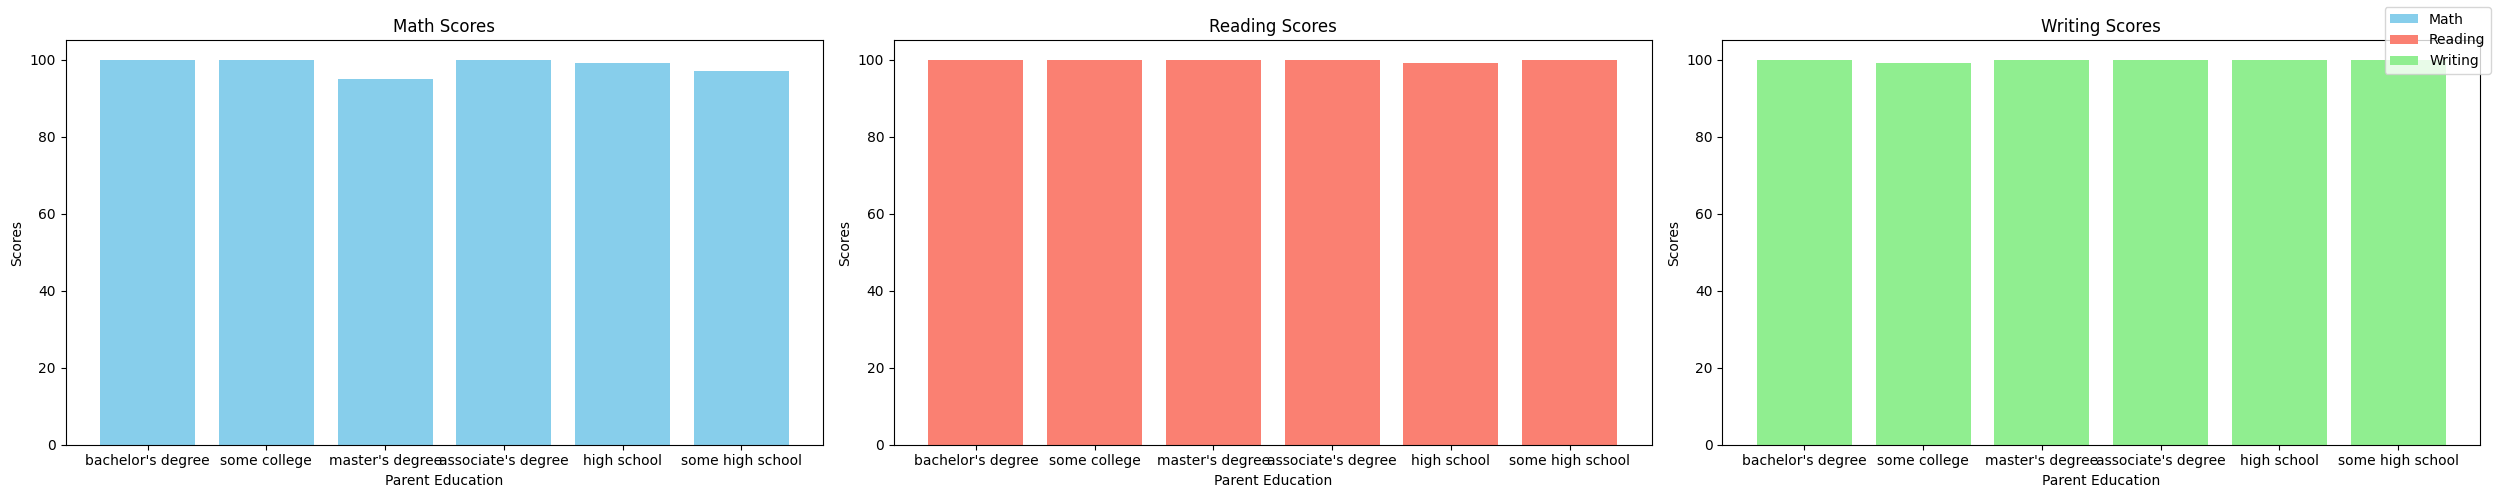

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

# Plot math scores
axes[0].bar(df['parental level of education'], df['math score'], color='skyblue', label='Math')
axes[0].set_title('Math Scores')
axes[0].set_xlabel('Parent Education')
axes[0].set_ylabel('Scores')

# Plot reading scores
axes[1].bar(df['parental level of education'], df['reading score'], color='salmon', label='Reading')
axes[1].set_title('Reading Scores')
axes[1].set_xlabel('Parent Education')
axes[1].set_ylabel('Scores')

# Plot writing scores
axes[2].bar(df['parental level of education'], df['writing score'], color='lightgreen', label='Writing')
axes[2].set_title('Writing Scores')
axes[2].set_xlabel('Parent Education')
axes[2].set_ylabel('Scores')

# Add legend
fig.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

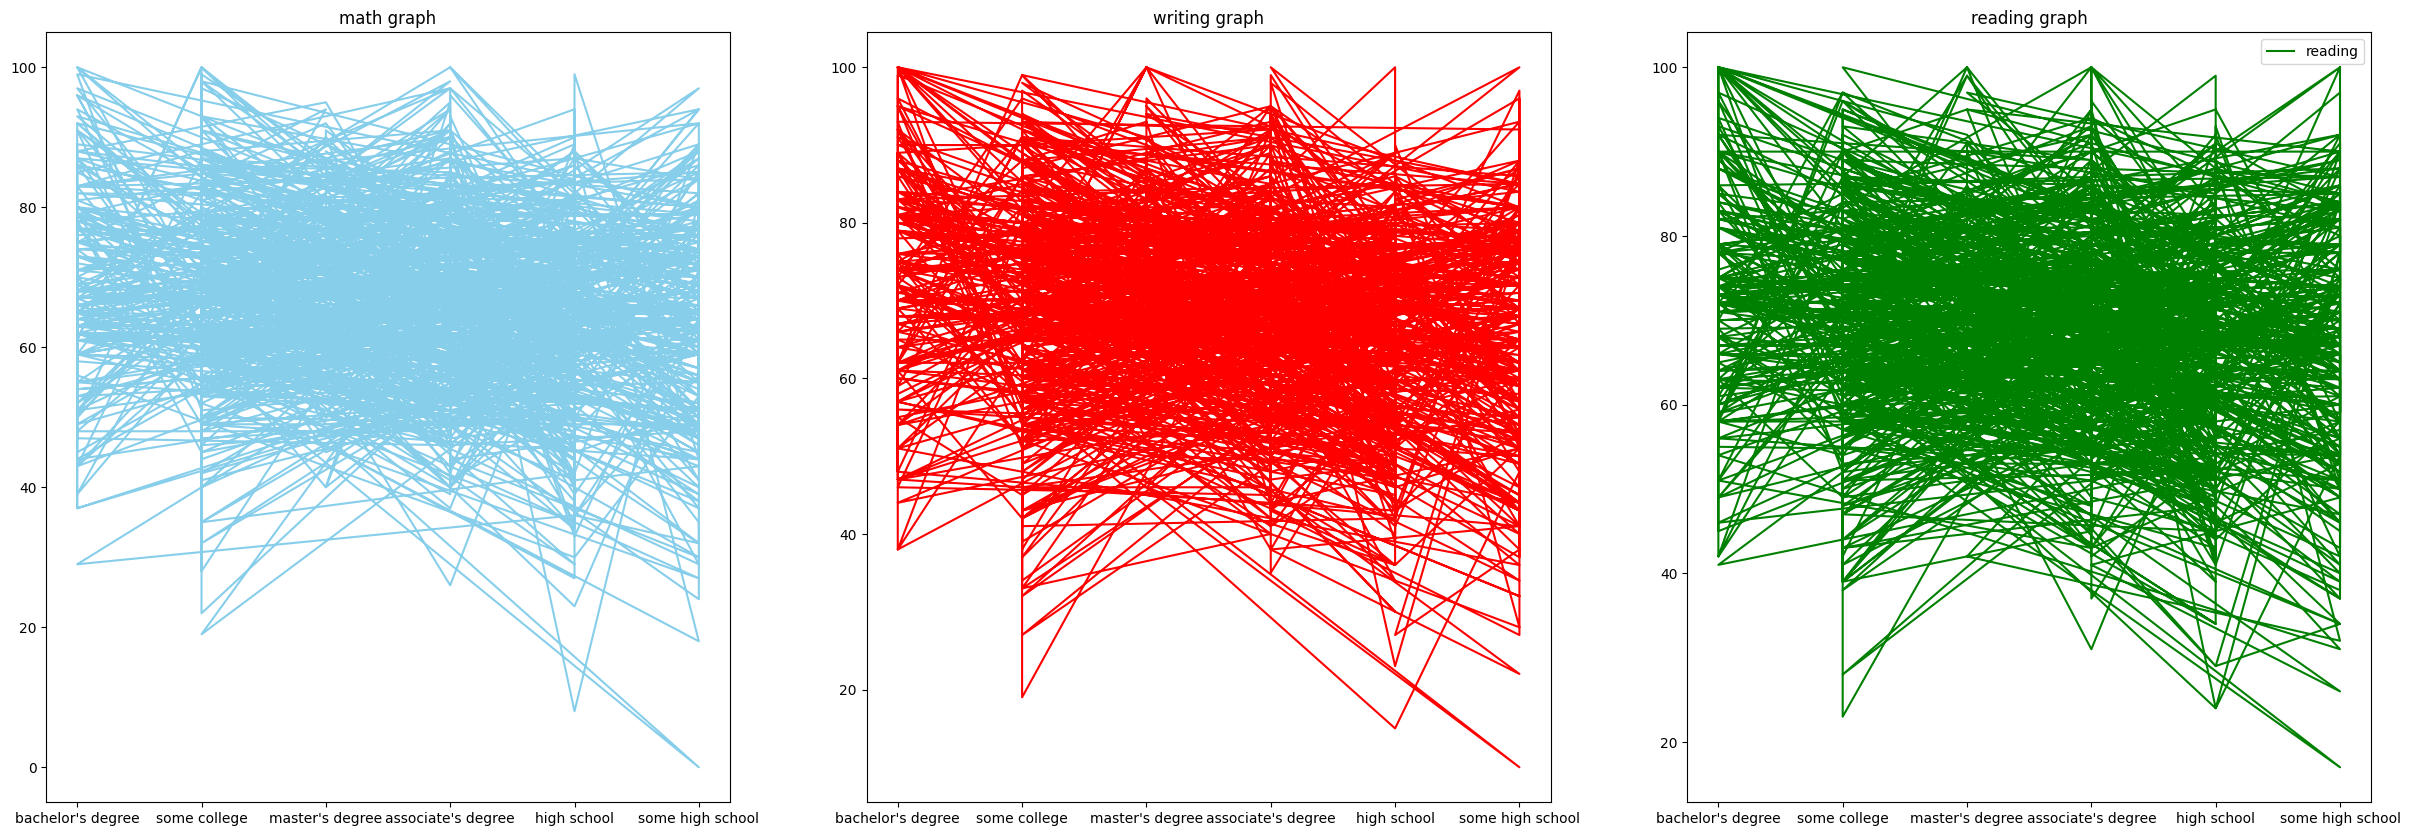

In [160]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.plot(df['parental level of education'], df['math score'], color='skyblue', label='Math')
plt.title("math graph")

plt.subplot(1,3,2)
plt.plot(df['parental level of education'], df['writing score'], color='red', label='writing')
plt.title("writing graph")

plt.subplot(1,3,3)
plt.plot(df['parental level of education'], df['reading score'], color='green', label='reading')
plt.title("reading graph")

plt.legend()
plt.show()


**Step 10:** Plot a graph to show a double bar graph against test preparation course of education vs. math, reading, writing score. Construct 3 graphs as subplots.



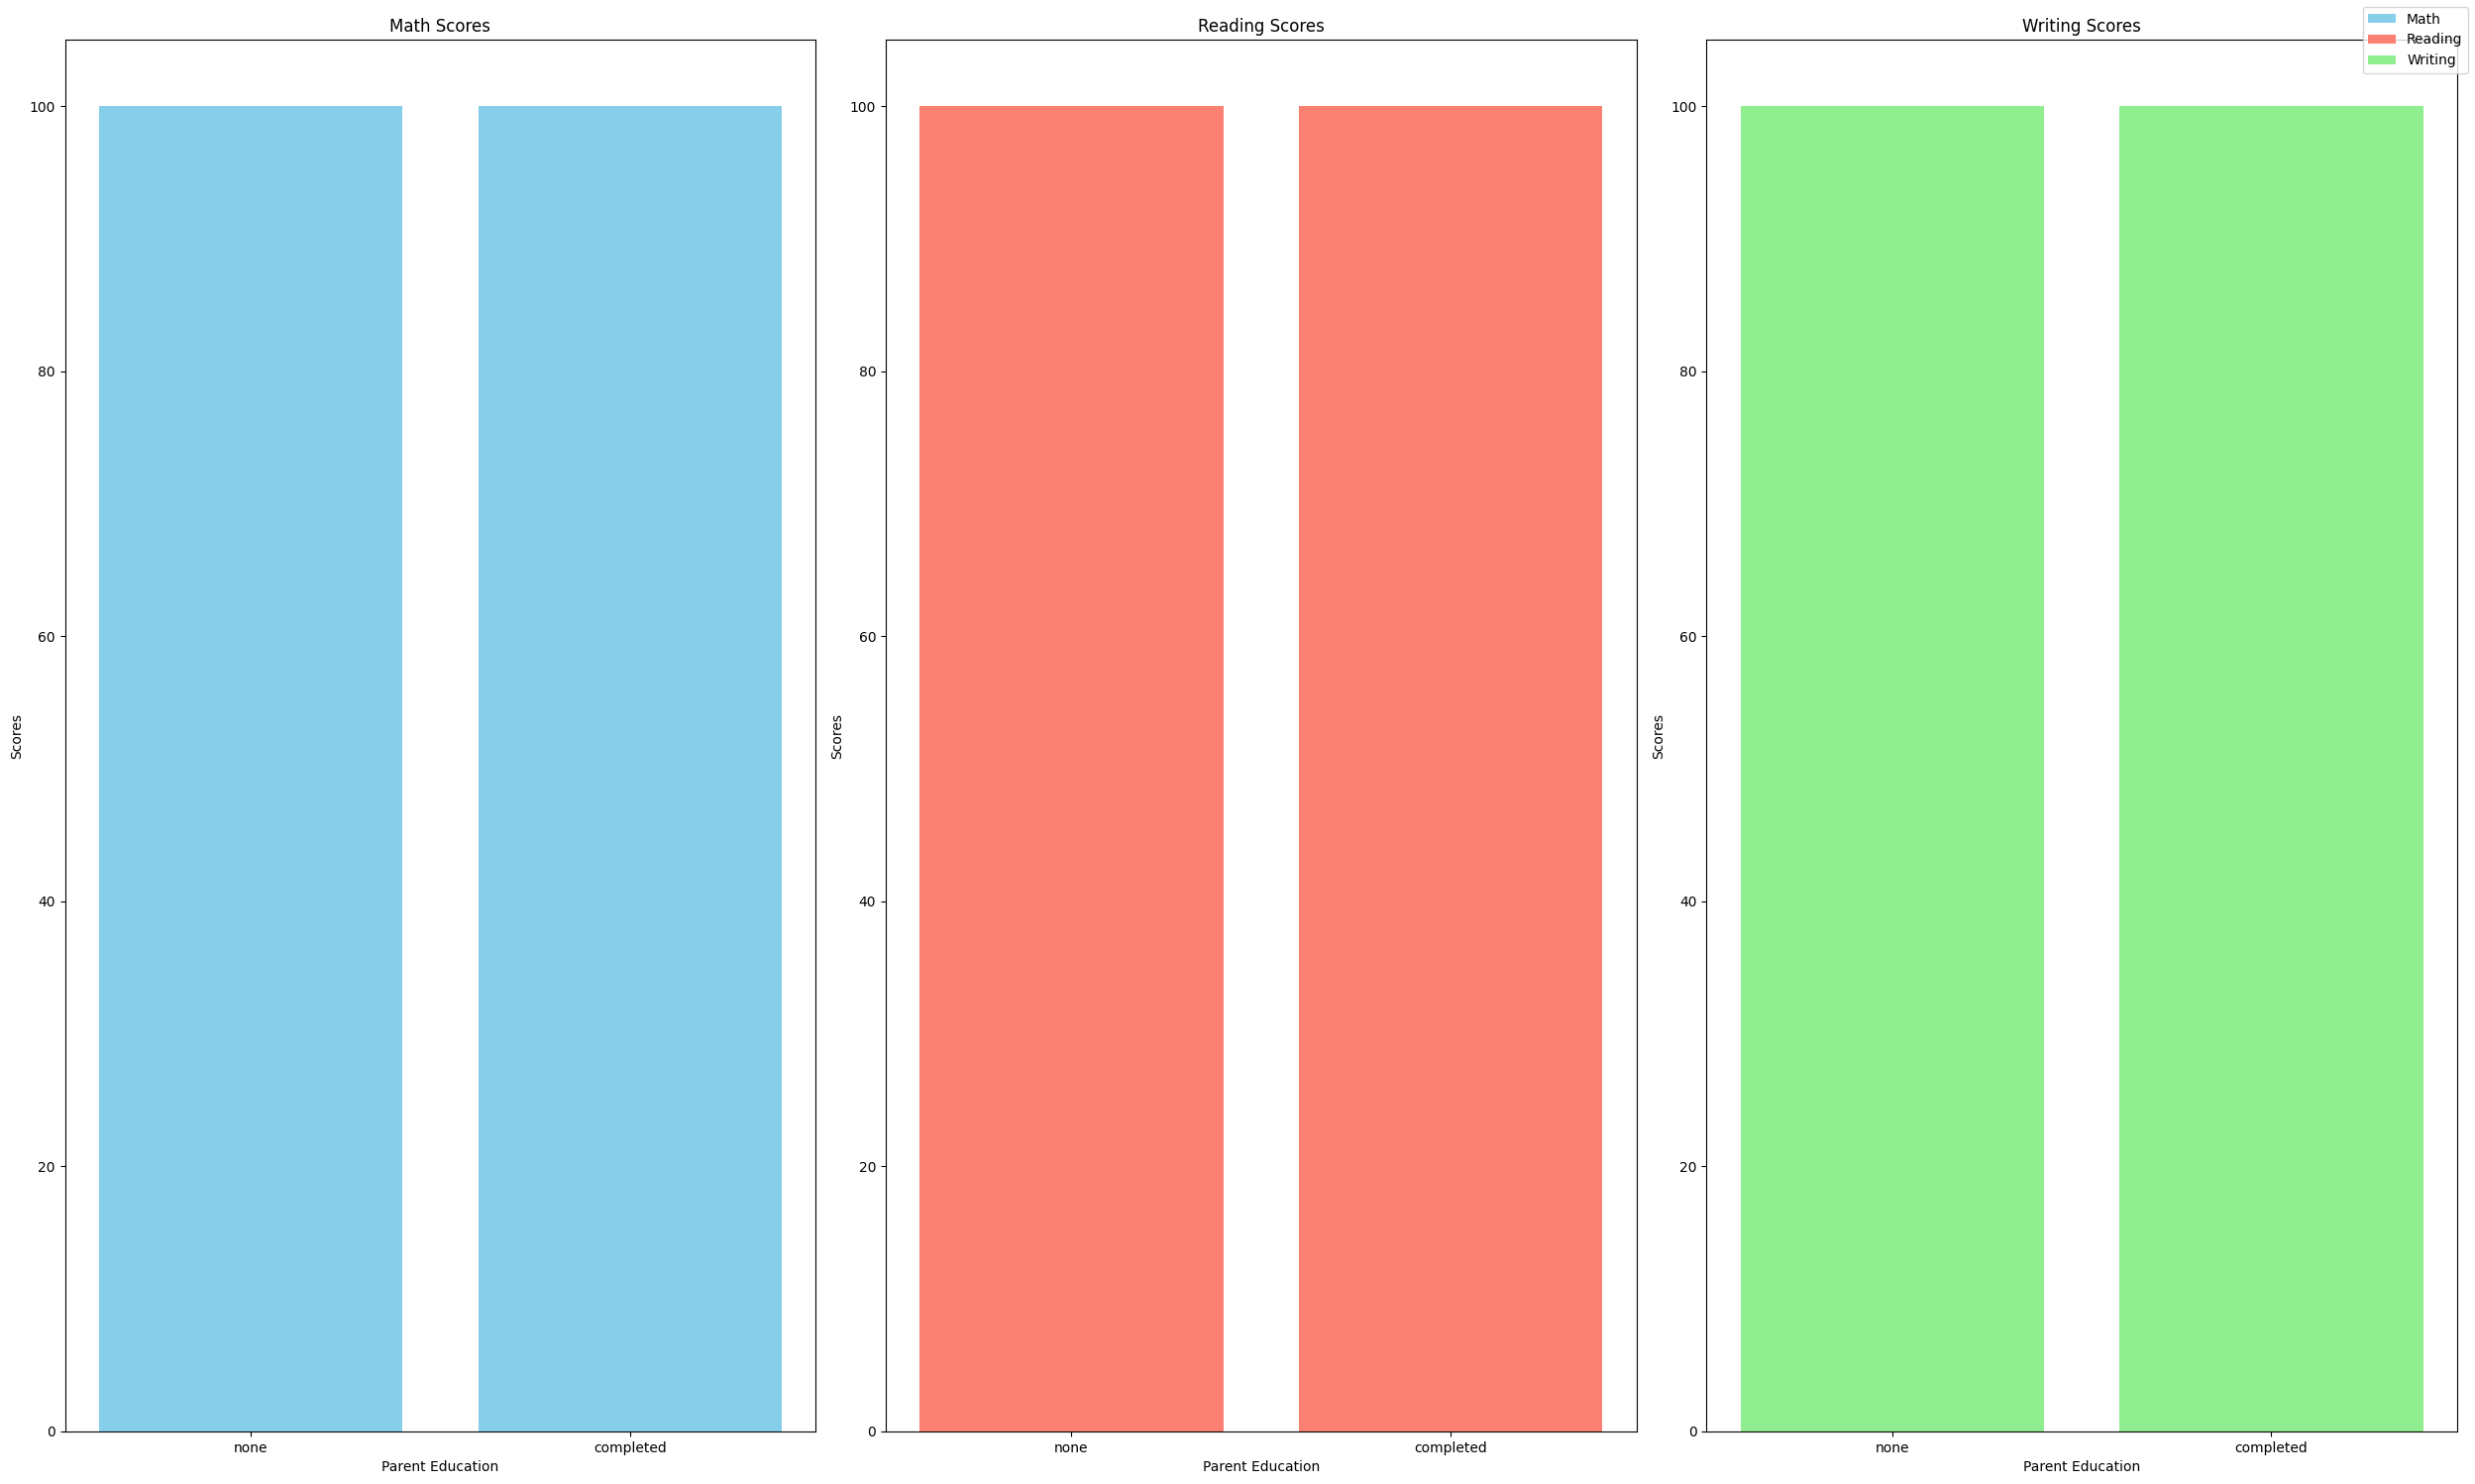

In [161]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 15))

# Plot math scores
axes[0].bar(df['test preparation course'], df['math score'], color='skyblue', label='Math')
axes[0].set_title('Math Scores')
axes[0].set_xlabel('Parent Education')
axes[0].set_ylabel('Scores')

# Plot reading scores
axes[1].bar(df['test preparation course'], df['reading score'], color='salmon', label='Reading')
axes[1].set_title('Reading Scores')
axes[1].set_xlabel('Parent Education')
axes[1].set_ylabel('Scores')

# Plot writing scores
axes[2].bar(df['test preparation course'], df['writing score'], color='lightgreen', label='Writing')
axes[2].set_title('Writing Scores')
axes[2].set_xlabel('Parent Education')
axes[2].set_ylabel('Scores')

# Add legend
fig.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

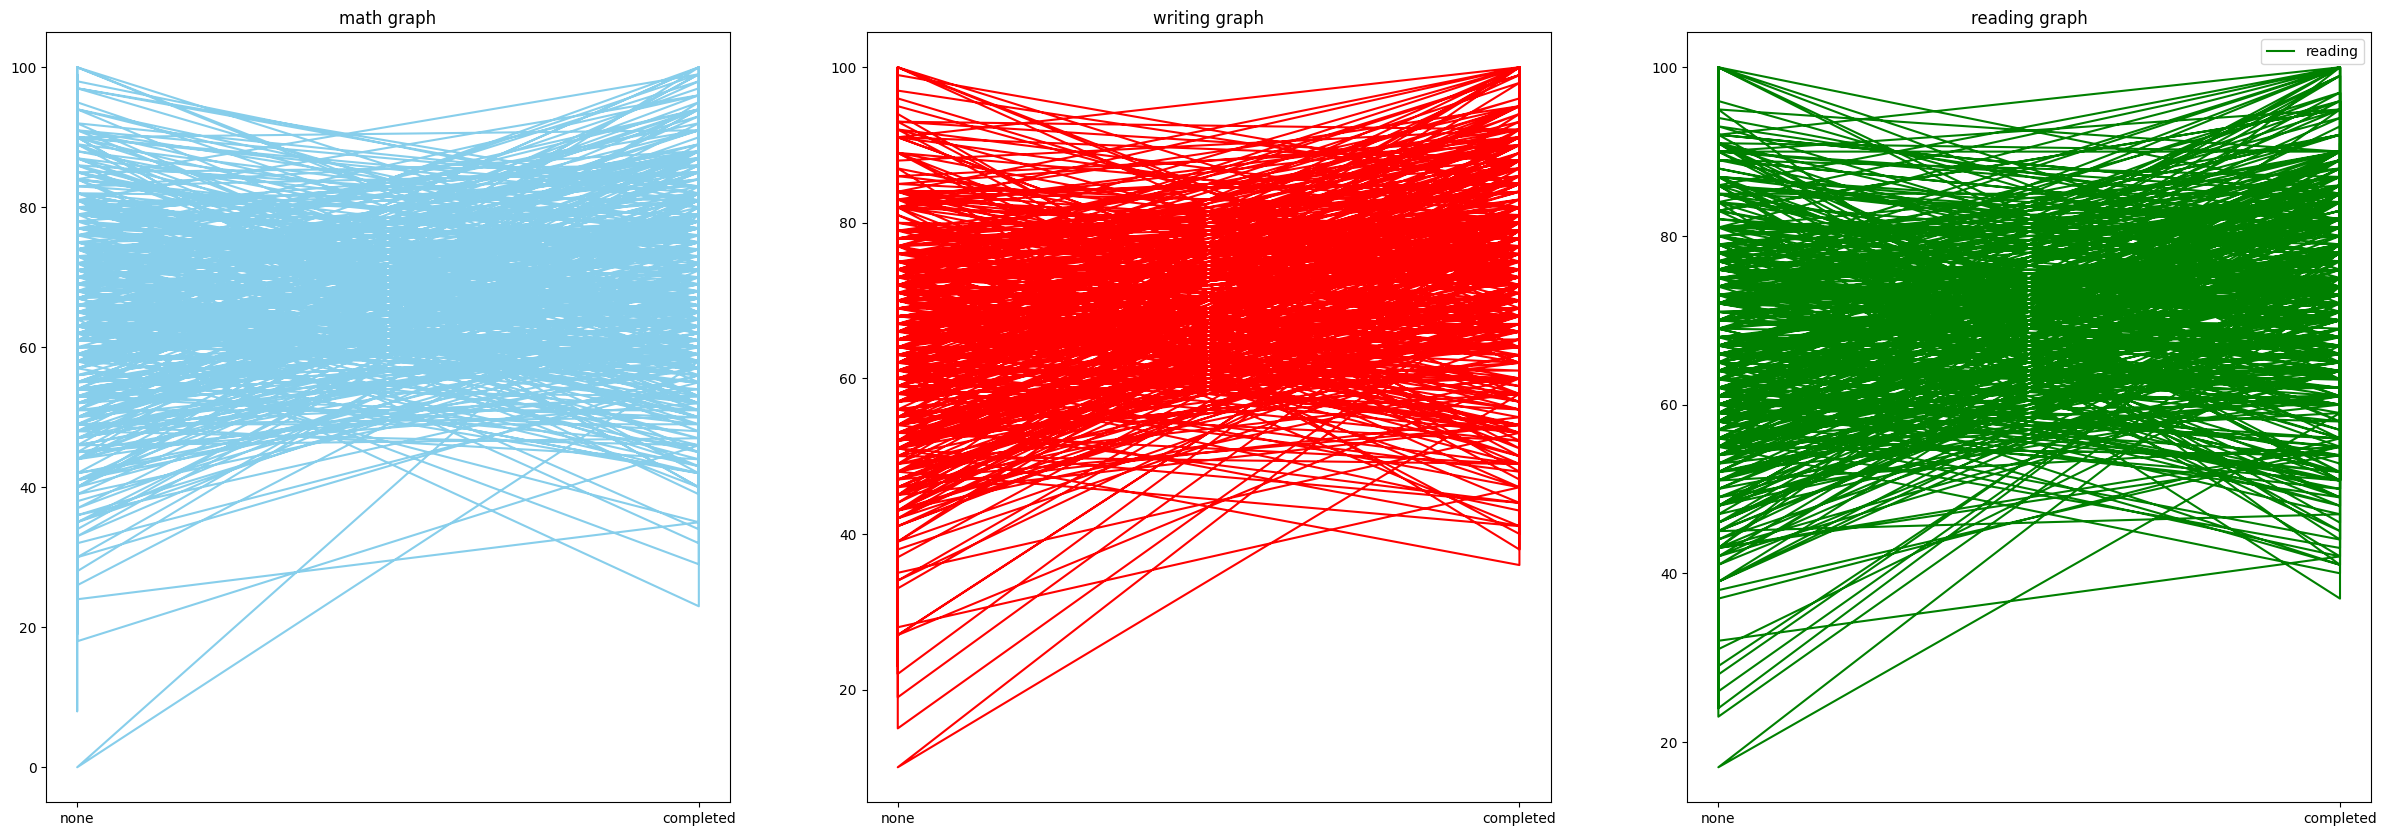

In [162]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.plot(df['test preparation course'], df['math score'], color='skyblue', label='Math')
plt.title("math graph")

plt.subplot(1,3,2)
plt.plot(df['test preparation course'], df['writing score'], color='red', label='writing')
plt.title("writing graph")

plt.subplot(1,3,3)
plt.plot(df['test preparation course'], df['reading score'], color='green', label='reading')
plt.title("reading graph")

plt.legend()
plt.show()

# **Building the Model**

Let's predict the writing score for a particular student.

**Step 1:** Define the X and y

In [163]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average1,pass_fail,math_pass_fail,reading_pass_fail,writing_pass_fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P,pass,pass,pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,P,pass,pass,pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,P,pass,pass,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,P,fail,pass,fail
4,male,group C,some college,standard,none,76,78,75,76.333333,P,pass,pass,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,P,pass,pass,pass
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,P,pass,pass,pass
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,P,pass,pass,pass
998,female,group D,some college,standard,completed,68,78,77,74.333333,P,pass,pass,pass


In [221]:
df['math score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [251]:
X =df[["race/ethnicity","parental level of education","lunch","test preparation course",'math score',	'average1',	'writing score']]
y = df['reading score']

In [252]:
y

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: reading score, Length: 1000, dtype: int64

In [253]:
X

,race/ethnicity,parental level of education,lunch,test preparation course,math score,average1,writing score
0,group B,bachelor's degree,standard,none,72,72.666667,74
1,group C,some college,standard,completed,69,82.333333,88
2,group B,master's degree,standard,none,90,92.666667,93
3,group A,associate's degree,free/reduced,none,47,49.333333,44
4,group C,some college,standard,none,76,76.333333,75
...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,94.000000,95
996,group C,high school,free/reduced,none,62,57.333333,55
997,group C,high school,free/reduced,completed,59,65.000000,65
998,group D,some college,standard,completed,68,74.333333,77


**Step 2:** Identify the various categorical columns present in the dataset.

In [254]:
X.dtypes[X.dtypes == object].index

Index(['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

**Step 3:** Convert the categorical variables into numerical variables by one hot encoding.

In [255]:
X = pd.get_dummies(X)
X

,math score,average1,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72.666667,74,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,82.333333,88,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,92.666667,93,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,47,49.333333,44,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76,76.333333,75,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,94.000000,95,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False
996,62,57.333333,55,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True
997,59,65.000000,65,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False
998,68,74.333333,77,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False


**Step 4**: Do train test split

In [256]:
from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2)

**Step 5:** Implement various models to see which ones have the highest accuracy.

In [257]:


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}



# **Model Evaluation:**

**Step 1:** Calculate the best models accuracy.

In [258]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{name}: Accuracy - {accuracy}")


c:\Users\tsgte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy - 0.01
Decision Tree: Accuracy - 0.075
Random Forest: Accuracy - 0.125


In [259]:
y_test

245     76
916    100
214     91
844     65
727     51
      ... 
476     62
833     82
628     57
789     65
133     81
Name: reading score, Length: 200, dtype: int64

In [260]:
y_pred

array([ 73, 100,  84,  55,  64,  58,  63,  43,  81,  78,  74,  61,  78,
        86,  70,  43,  55,  52,  56,  97,  60,  57,  41,  66,  63,  72,
        68,  55,  64,  74,  71,  78,  70,  89,  76,  82,  56,  59,  71,
        70,  66,  48,  51,  56,  68,  59,  82,  78,  74,  67,  55,  75,
        74,  72,  59,  41,  72,  81,  70,  53,  78,  58,  78,  66,  51,
        54,  70,  68,  66,  68,  74,  82,  51,  60,  61,  73,  63,  82,
        72, 100,  66,  52,  64,  64,  64,  48,  64,  86,  57,  43,  75,
        56,  82,  65,  60, 100,  81,  75,  63,  73,  80,  56,  39,  77,
        72,  78,  94,  55,  78,  72,  85,  56,  54,  79,  60,  71,  79,
        83,  51,  83,  69,  57,  62,  86,  75,  67,  70,  52,  83,  89,
        76,  48,  64,  77,  74, 100,  68,  24,  72,  71,  80,  60,  79,
        70,  83,  62,  88,  68,  86,  88,  73,  72,  58,  90,  66,  68,
        72,  70,  70,  89,  72,  72,  77,  67,  55,  66,  67,  70,  84,
        91,  85,  72,  73,  67,  63,  64,  58,  67,  72,  58,  6

In [261]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.125

In [262]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
mse


20.745

In [263]:
model_score = model.score(X_test,y_test)
model_score

0.125

**Step 2:** Make predictions

In [268]:
new_data = pd.DataFrame({'race/ethnicity' :['group B'],
                         'parental level of education':["bachelor's degree"],	
                         'lunch':['standard'],
                         'test preparation course':['completed'],
                         'math score':89	,'average1':72.39	,'writing score':73})

In [269]:
new_data

,race/ethnicity,parental level of education,lunch,test preparation course,math score,average1,writing score
0,group B,bachelor's degree,standard,completed,89,72.39,73


In [270]:
new_data_encoded =pd.get_dummies(new_data)
new_data_encoded

,math score,average1,writing score,race/ethnicity_group B,parental level of education_bachelor's degree,lunch_standard,test preparation course_completed
0,89,72.39,73,True,True,True,True


In [ ]:
predict = model.predict(new_data_encoded)
predict



**Step 3:** Construct a confusion matrix for the predictions

<Axes: >

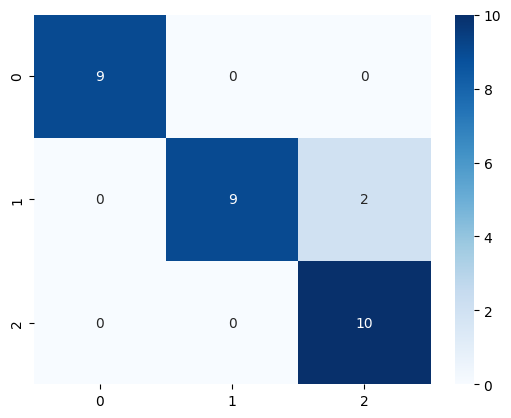

In [208]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization

sns.heatmap(cm,annot=True,cmap="Blues",fmt="g",cbar="False")


array([[ 9,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 10]], dtype=int64)